# Carbonate membership functions for depth

In [1]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [2]:
def plot_fuzzy_curve(bathy,law,label,color='b'):
    fig, ax0 = plt.subplots(figsize=(8, 4))
    ax0.plot(bathy, law, color, linewidth=4, label=label)
    lg = ax0.legend(loc=4)
    lg.draw_frame(False)
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('Depth [m]')
    plt.ylabel('Fuzzy value')
    plt.show()
    return

In [9]:
datafolder='../data/'

In [3]:
depth = np.linspace(0.0, 100.0, num=1000, endpoint=True)

# Shallow MBF

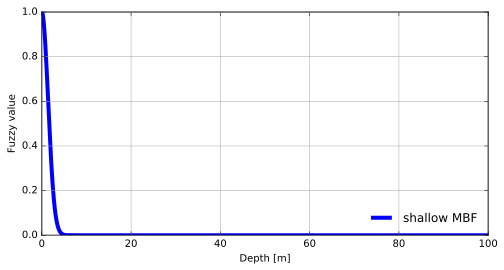

In [4]:
# Parameters
shallow_depth_sigma = 2
shallow = fuzz.gaussmf(depth, 0, shallow_depth_sigma)

# Visualise fuzzy production curve
plot_fuzzy_curve(depth,shallow,'shallow MBF')

In [5]:
# Write membership function
nameCSV = 'mbf_shallow_depth'
df = pd.DataFrame({'X':depth,'Y':shallow})
df.to_csv(str(datafolder)+str(nameCSV)+'.csv',columns=['X', 'Y'], sep=' ', index=False ,header=0)

# Mid-depth MBF

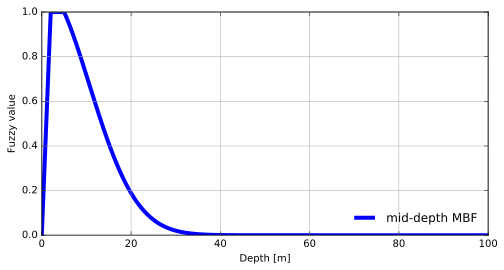

In [6]:
# Parameters
zt = 2.
zb = 5.
mid_depth_sigma = 15.

# Define production curve below zb
mdepth = fuzz.gaussmf(depth, 0, mid_depth_sigma)
id = np.where(depth>=zb)[0]
pt = id[0]
factor = 1.
if mdepth[pt] > 0. and mdepth[pt]<=1.:
    factor = 1./mdepth[pt]
mdepth = mdepth*factor    
mdepth[mdepth>1] = 1.

# Define production curve above zt
tri = fuzz.trimf(depth, [0, zt, zb])
id = np.where(depth<zt)[0]
mdepth[id] = tri[id]

# Visualise fuzzy production curve
plot_fuzzy_curve(depth,mdepth,'mid-depth MBF')

In [7]:
# Write membership function
nameCSV = 'mbf_medium_depth'
df = pd.DataFrame({'X':depth,'Y':mdepth})
df.to_csv(str(datafolder)+str(nameCSV)+'.csv',columns=['X', 'Y'], sep=' ', index=False ,header=0)

# Pelagic MBF

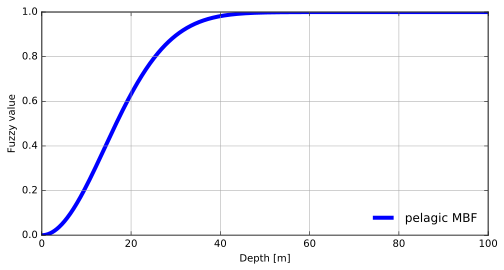

In [8]:
# Parameters
pelagic_depth_sigma = 20
pelagic = 1.-fuzz.gaussmf(depth, 0, pelagic_depth_sigma)

# Visualise fuzzy production curve
plot_fuzzy_curve(depth,pelagic,'pelagic MBF')

In [10]:
# Write membership function
nameCSV = 'mbf_deep_depth'
df = pd.DataFrame({'X':depth,'Y':pelagic})
df.to_csv(str(datafolder)+str(nameCSV)+'.csv',columns=['X', 'Y'], sep=' ', index=False ,header=0)